In [11]:
import numpy as np
from uncertainties import ufloat
import uncertainties.unumpy as unp 

import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants as const

## Funktionen

In [122]:
def b_feld_spule(N, R, I):
    return const.mu_0 * (8*I*N/(np.sqrt(125)*R))

def B_fit(a,b,f):
    return a*f +b

## Konstanten

In [161]:
I_hor = 2.24 * 0.1 #Ampere
Erd = 3.85 
mu_B = const.value("Bohr magneton in Hz/T")
h = const.h
me = const.m_e
e = const.e
#Konstanten der Spulen

r_sweep = 0.1639 #Meter
N_sweep = 11
r_hor = 0.1579 #Meter
N_hor = 154
r_ver = 0.11735 #Meter
N_ver = 20

In [78]:
df_f = pd.read_csv('frequenz.csv')
print(df_f.keys())

#Fehler

df_f["I_sweep1"] = unp.uarray(df_f["I_sweep1"],[0.01])
df_f["I_sweep2"] = unp.uarray(df_f["I_sweep2"],[0.01])
df_f["I_hor1"] = unp.uarray(df_f["I_hor1"],[0.01])
df_f["I_hor2"] = unp.uarray(df_f["I_hor2"],[0.01])

df_f

Index(['f', 'I_sweep1', 'I_sweep2', 'I_hor1', 'I_hor2'], dtype='object')


,f,I_sweep1,I_sweep2,I_hor1,I_hor2
0,100,6.250+/-0.010,7.340+/-0.010,0.000+/-0.010,0.000+/-0.010
1,200,4.400+/-0.010,6.770+/-0.010,0.100+/-0.010,0.100+/-0.010
2,300,4.220+/-0.010,7.750+/-0.010,0.160+/-0.010,0.160+/-0.010
3,400,2.960+/-0.010,7.700+/-0.010,0.240+/-0.010,0.240+/-0.010
4,500,3.060+/-0.010,8.980+/-0.010,0.300+/-0.010,0.300+/-0.010
5,600,3.220+/-0.010,7.100+/-0.010,0.340+/-0.010,0.420+/-0.010
6,700,3.340+/-0.010,6.980+/-0.010,0.400+/-0.010,0.500+/-0.010
7,800,3.800+/-0.010,4.320+/-0.010,0.440+/-0.010,0.640+/-0.010
8,900,6.070+/-0.010,5.540+/-0.010,0.440+/-0.010,0.700+/-0.010
9,1000,7.830+/-0.010,7.100+/-0.010,0.480+/-0.010,0.740+/-0.010


## Magentfeld-Berechnung

In [79]:
df_f["B_1"] = b_feld_spule(N_sweep, r_sweep, df_f["I_sweep1"] * 0.1) + b_feld_spule(N_hor, r_hor, df_f["I_hor1"] * 0.3)
df_f["B_2"] = b_feld_spule(N_sweep, r_sweep, df_f["I_sweep2"] * 0.1) + b_feld_spule(N_hor, r_hor, df_f["I_hor2"] * 0.3)

In [80]:
df_f

,f,I_sweep1,I_sweep2,I_hor1,I_hor2,B_1,B_2
0,100,6.250+/-0.010,7.340+/-0.010,0.000+/-0.010,0.000+/-0.010,(3.77+/-0.26)e-05,(4.43+/-0.26)e-05
1,200,4.400+/-0.010,6.770+/-0.010,0.100+/-0.010,0.100+/-0.010,(5.29+/-0.26)e-05,(6.72+/-0.26)e-05
2,300,4.220+/-0.010,7.750+/-0.010,0.160+/-0.010,0.160+/-0.010,(6.76+/-0.26)e-05,(8.89+/-0.26)e-05
3,400,2.960+/-0.010,7.700+/-0.010,0.240+/-0.010,0.240+/-0.010,(8.10+/-0.26)e-05,0.0001096+/-0.0000026
4,500,3.060+/-0.010,8.980+/-0.010,0.300+/-0.010,0.300+/-0.010,(9.74+/-0.26)e-05,0.0001331+/-0.0000026
5,600,3.220+/-0.010,7.100+/-0.010,0.340+/-0.010,0.420+/-0.010,0.0001089+/-0.0000026,0.0001533+/-0.0000026
6,700,3.340+/-0.010,6.980+/-0.010,0.400+/-0.010,0.500+/-0.010,0.0001254+/-0.0000026,0.0001737+/-0.0000026
7,800,3.800+/-0.010,4.320+/-0.010,0.440+/-0.010,0.640+/-0.010,0.0001387+/-0.0000026,0.0001944+/-0.0000026
8,900,6.070+/-0.010,5.540+/-0.010,0.440+/-0.010,0.700+/-0.010,0.0001524+/-0.0000026,0.0002176+/-0.0000026
9,1000,7.830+/-0.010,7.100+/-0.010,0.480+/-0.010,0.740+/-0.010,0.0001735+/-0.0000026,0.0002375+/-0.0000026


In [85]:
print((df_f["I_sweep1"].to_numpy()))

[6.25+/-0.01 4.4+/-0.01 4.22+/-0.01 2.96+/-0.01 3.06+/-0.01 3.22+/-0.01
 3.34+/-0.01 3.8+/-0.01 6.07+/-0.01 7.83+/-0.01]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


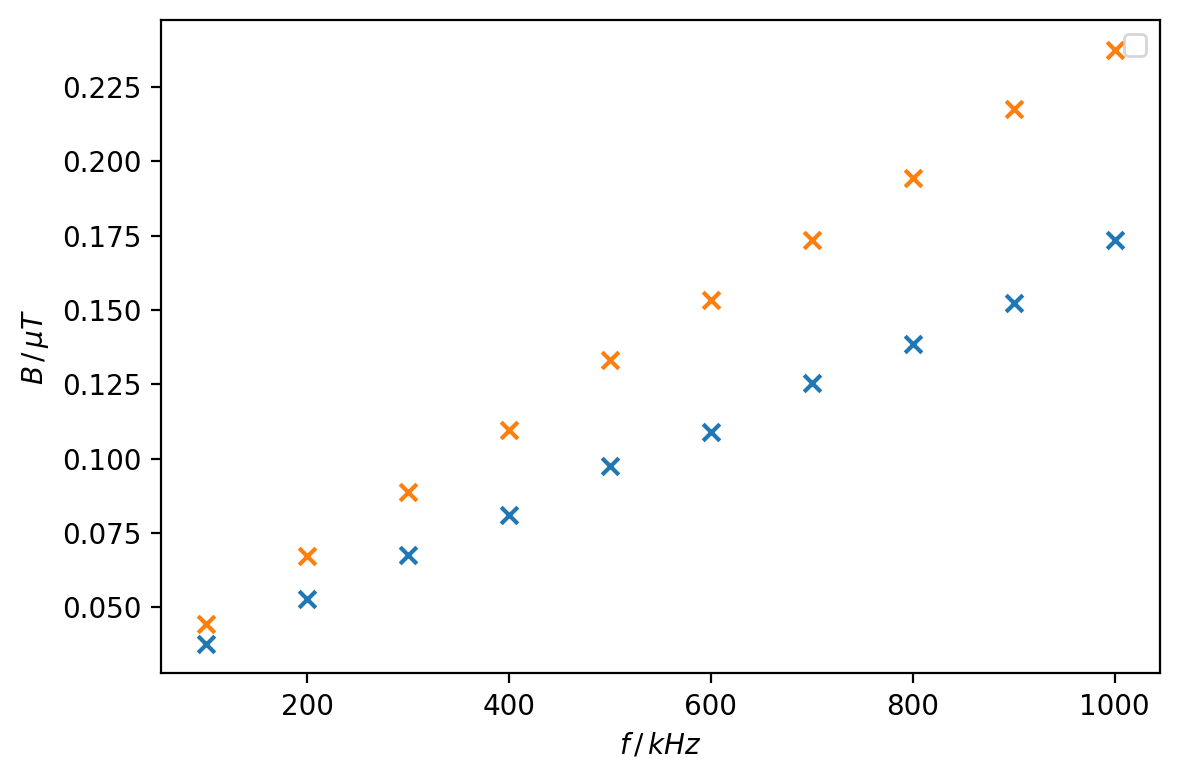

In [93]:
plt.figure(figsize=(6,4), dpi=200)
#plt.errorbar(df_f["f"], unp.nominal_values(T_p), yerr=unp.std_devs(T_p),  fmt='bx', label='sample')
plt.scatter(df_f["f"].to_numpy(), unp.nominal_values(df_f["B_1"].to_numpy()) * 1000, marker = "x")
plt.scatter(df_f["f"].to_numpy(), unp.nominal_values(df_f["B_2"].to_numpy()) * 1000,  marker = "x")
plt.ylabel(r'$B \,/\, \mu T$')
plt.xlabel(r'$f \,/\, kHz$')
plt.legend()
plt.tight_layout()
plt.show()

In [149]:
params1, cov1 = curve_fit(B_fit, df_f["f"].to_numpy() * 1000, unp.nominal_values(df_f["B_1"].to_numpy()))
uncertainties1 = np.sqrt(np.diag(cov1))

b1 = ufloat(params1[0], uncertainties1[0])
a1 = ufloat(params1[1], uncertainties1[1])

print("a1: ", a1)
print("b1: ", b1)

params2, cov2 = curve_fit(B_fit, df_f["f"].to_numpy() * 1000 , unp.nominal_values(df_f["B_2"].to_numpy()), sigma = unp.std_devs(df_f["B_2"].to_numpy()), absolute_sigma = True)
uncertainties2 = np.sqrt(np.diag(cov2))

b2 = ufloat(params2[0], uncertainties2[0])
a2 = ufloat(params2[1], uncertainties2[1])

print("a2: ", a2)
print("b2: ", b2)

a1:  (1.466+/-0.022)e-10
b1:  (2.29+/-0.13)e-05
a2:  (2.141+/-0.029)e-10
b2:  (2.42+/-0.18)e-05


In [154]:
print(unp.nominal_values(a1))

1.4662848186935045e-10


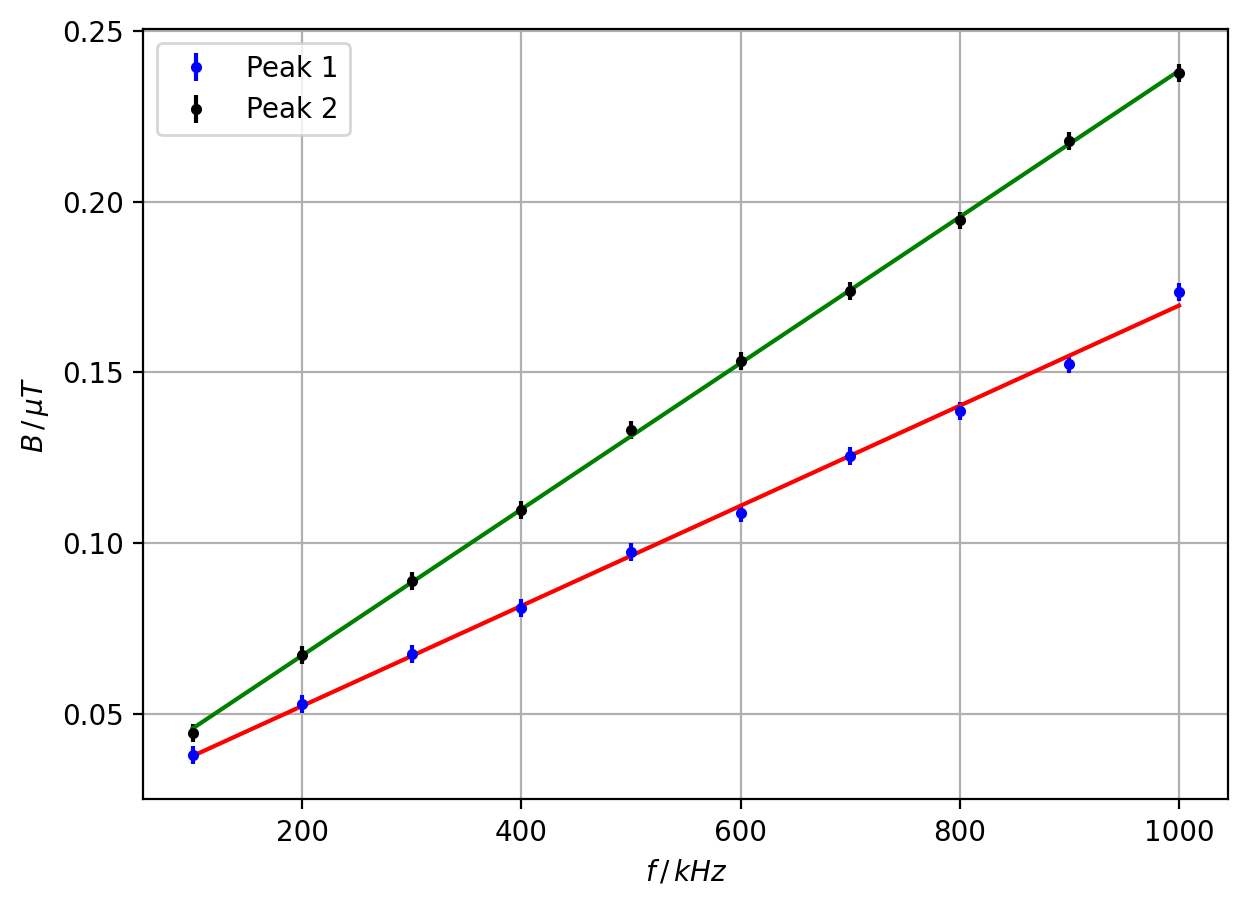

In [157]:
f_lin = np.linspace(df_f['f'].min(), df_f['f'].max(), 100)

plt.figure(figsize=(7,5),dpi=200)

plt.errorbar(df_f["f"].to_numpy(), unp.nominal_values(df_f["B_1"].to_numpy())*1000, yerr=unp.std_devs(df_f["B_1"].to_numpy())*1000,  fmt='b.', label='Peak 1')
plt.errorbar(df_f["f"].to_numpy(), unp.nominal_values(df_f["B_2"].to_numpy())*1000, yerr=unp.std_devs(df_f["B_2"].to_numpy())*1000,  fmt='k.', label='Peak 2')
plt.plot(f_lin, B_fit(unp.nominal_values(a1), unp.nominal_values(b1) , f_lin*1000)*1000, 'r-')
plt.plot(f_lin, B_fit(unp.nominal_values(a2),unp.nominal_values(b2),f_lin*1000)*1000, 'g-')
plt.ylabel(r'$B \,/\, \mu T$')
plt.xlabel(r'$f \,/\, kHz$')
plt.grid()
plt.legend()

## Berechnung der Lande Faktoren

In [163]:
g_f1 = me/e * 4*np.pi * 1/a1
print(g_f1)

g_f2 = me/e * 4*np.pi * 1/a2
print(g_f2)

0.487+/-0.007
0.334+/-0.005


## Berechnung der Kern-Spins

In [168]:
def kernspin(gf):
    return -1+(2/(4*gf))+ np.sqrt((1-(2/(4*gf)))**2 - (3/4)*(1-(2/gf)))

print(kernspin(unp.nominal_values(g_f1)))
print(kernspin(unp.nominal_values(g_f2)))

1.5522481468616802
2.496457859619925
